In [98]:
# importing important libraries
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesRegressor




In [8]:
data = pd.read_csv('Data Scientist Interview Assignment - TicketReport_2019-09-25 (1).csv')
data.head()

,order_no,discount_amount,adults,booking_fee,paid_from_wallet,order_time,source,isRelease,trip_type,leg_name,commission,departure_time,bf_discount,trip_id,isCancel,net_revenue,base_id,travel_date,ff_discount,facility_fee,amount_in_usd,voucher_consumption,paid_from_card,pick_stop
0,774016,11.25,1,0,0,09-25-2019 3:47:29,WEB,False,C,Kendall Park to NYC Commuter,0,6:25:00 AM,0,16009,False,0.0,294729,09-25-2019,0,0,11.25,0,0.0,Kendall Park Roller Skating Rink
1,774017,11.25,1,0,0,09-25-2019 3:48:52,WEB,False,C,"New York, NY - Kendall Park Commuter",0,5:30:00 PM,0,310958,False,0.0,294729,09-25-2019,0,0,11.25,0,0.0,Times Square
2,774027,10.25,1,0,0,09-25-2019 5:24:09,IOS,False,C,Kendall Park to NYC Commuter,0,6:25:00 AM,0,16009,False,0.0,1338,09-25-2019,0,0,10.25,0,0.0,Kendall Park Roller Skating Rink
3,774027,10.25,1,0,0,09-25-2019 5:24:09,IOS,False,C,"New York, NY - Kendall Park Commuter",0,5:30:00 PM,0,310958,False,0.0,1338,09-25-2019,0,0,10.25,0,0.0,Kendall Park Roller Skating Rink
4,774029,11.25,1,0,0,09-25-2019 5:38:44,WEB,False,C,Kendall Park to NYC Commuter,0,6:25:00 AM,0,16009,False,0.0,35,09-25-2019,0,0,11.25,0,0.0,Kendall Park Post Office


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_no             270 non-null    int64  
 1   discount_amount      270 non-null    float64
 2   adults               270 non-null    int64  
 3   booking_fee          270 non-null    int64  
 4   paid_from_wallet     270 non-null    int64  
 5   order_time           270 non-null    object 
 6   source               270 non-null    object 
 7   isRelease            270 non-null    bool   
 8   trip_type            270 non-null    object 
 9   leg_name             270 non-null    object 
 10  commission           270 non-null    int64  
 11  departure_time       270 non-null    object 
 12  bf_discount          270 non-null    int64  
 13  trip_id              270 non-null    int64  
 14  isCancel             270 non-null    bool   
 15  net_revenue          270 non-null    flo

In [10]:
data.isna().sum()

order_no               0
discount_amount        0
adults                 0
booking_fee            0
paid_from_wallet       0
order_time             0
source                 0
isRelease              0
trip_type              0
leg_name               0
commission             0
departure_time         0
bf_discount            0
trip_id                0
isCancel               0
net_revenue            0
base_id                0
travel_date            0
ff_discount            0
facility_fee           0
amount_in_usd          0
voucher_consumption    0
paid_from_card         0
pick_stop              0
dtype: int64

# Preprocessing the data
We will be preprocessng our data where we will add columns, remove unnessary columns

In [11]:
# now drop unnecessay columns
def preprocess_inputs(df):
    df = df.copy()
    
    # Add day column out of order time
    df['day'] = df['order_time'].str[3:5]
    
    
    
    # converting day column into int type
    df['day'] = df['day'].astype('int32')
    
    '''drop unnecessary columns like order_no, order time(as we have got our day), vouchers_consumed,facility_fee,ff_discount,
    bf_discount,commission,isRelease,booking_fee as these column has only one unique values'''
    
    '''Assuming the once the customer books a trip he will surely trave, by this assumption we can drop travel_date column
    and this assumption also get strong by analysing the isCancel column which only has false value meaning that customer has 
    never cancel a flight'''
    
    '''As trip_type column has only one value that is 'C' so i am assuming that only one type of trip is present and we can drop 
    this column as well'''
    
    '''As no customer has paid from wallet so we can drop this column as it only has one value i.e 0'''
    
    
    df = df.drop('voucher_consumption', axis = 1)
    df = df.drop('facility_fee', axis = 1)
    df = df.drop('ff_discount', axis = 1)
    df = df.drop('order_no', axis = 1)
    df = df.drop('trip_type', axis = 1)
    df = df.drop('isRelease', axis = 1)
    df = df.drop('commission', axis = 1)
    df = df.drop('bf_discount', axis = 1)
    df = df.drop('travel_date', axis = 1)
    df = df.drop('isCancel', axis = 1)
    df = df.drop('booking_fee', axis = 1)
    df = df.drop('paid_from_wallet', axis = 1)
    df = df.drop('order_time', axis = 1)
    
    # ordinal encoding
    '''We can encode source,leg_name,departure_time,pick_stop'''
    
    df['source'] = df['source'].replace({'WEB': 0, 'IOS': 1, 'ANDROID':2})
    df['leg_name'] = df['leg_name'].replace({'Kendall Park to NYC Commuter': 0, 'New York, NY - Kendall Park Commuter': 1})
    df['pick_stop'] = df['pick_stop'].replace({'Kendall Park Roller Skating Rink':0, 'Times Square':1,
                                               'Kendall Park Post Office':2,'Green Hill Manor Club House':3,
                                                'Stillwell Road':4,'Ninth Ave & 42nd Stret':5})
    
    df['departure_time'] = df['departure_time'].replace({'6:25:00 AM':0,'6:40:00 AM':1,'6:55:00 AM':2,'5:30:00 PM':3})
    
    
    return df

In [12]:
updated_data = preprocess_inputs(data)
updated_data.head()

,discount_amount,adults,source,leg_name,departure_time,trip_id,net_revenue,base_id,amount_in_usd,paid_from_card,pick_stop,day
0,11.25,1,0,0,0,16009,0.0,294729,11.25,0.0,0,25
1,11.25,1,0,1,3,310958,0.0,294729,11.25,0.0,1,25
2,10.25,1,1,0,0,16009,0.0,1338,10.25,0.0,0,25
3,10.25,1,1,1,3,310958,0.0,1338,10.25,0.0,0,25
4,11.25,1,0,0,0,16009,0.0,35,11.25,0.0,2,25


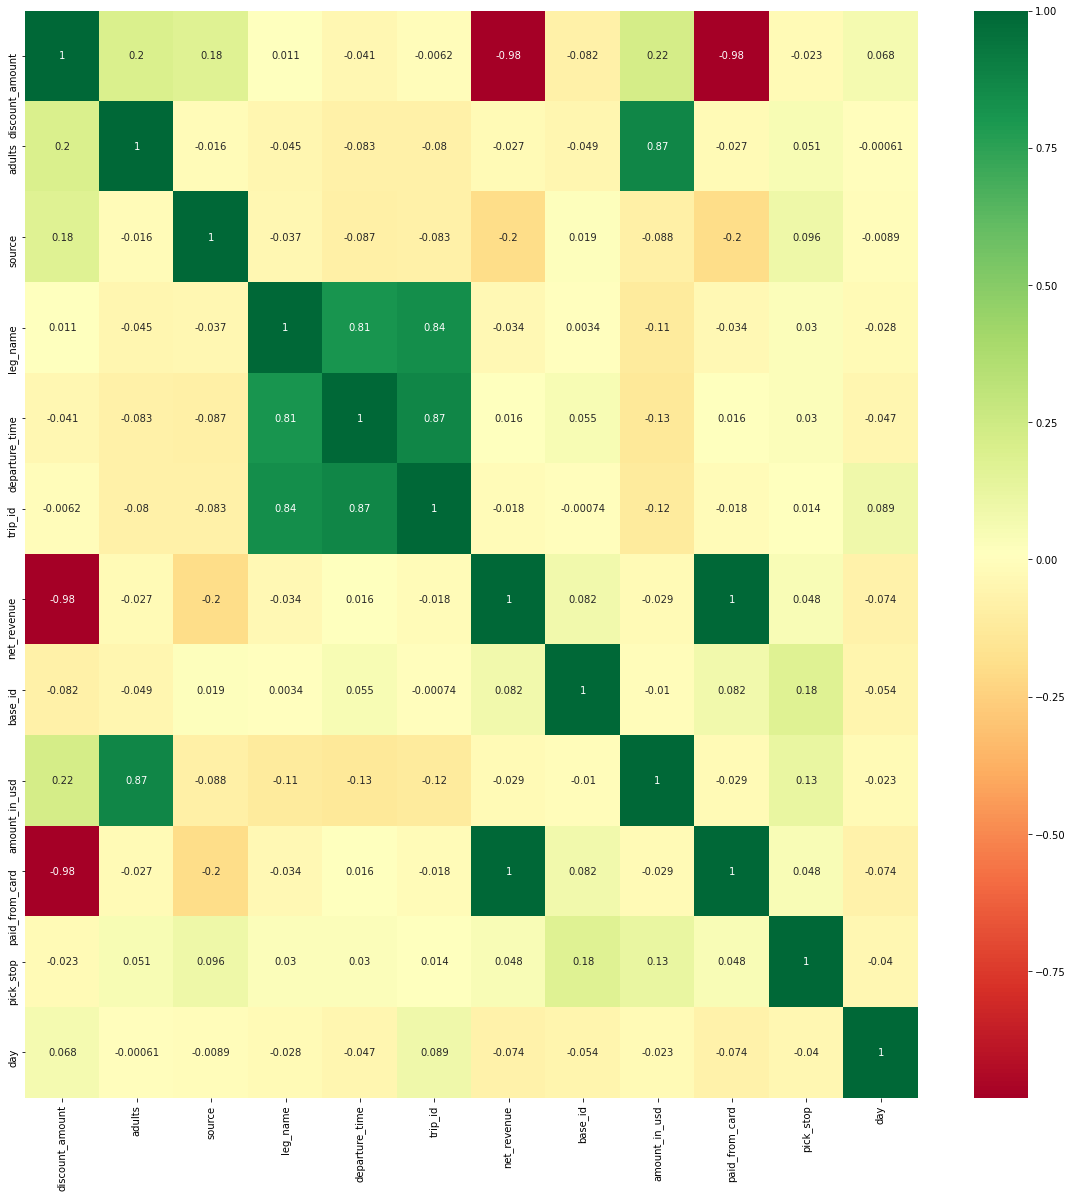

In [13]:
#correlations of each features in dataset
corrmat = updated_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(updated_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
!pip install klib
import klib

You should consider upgrading via the 'D:\anaconda\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

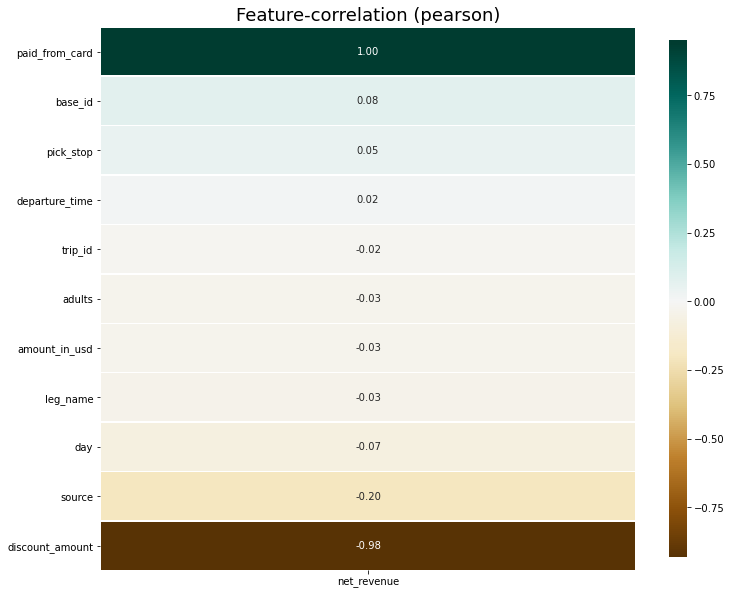

In [16]:
klib.corr_plot(updated_data, target='net_revenue')

As it can be seen that trip id, departure time, has lowest correlation with net revenue so its better to drop them.

# Splitting the data into train and test data

In [29]:
def preprocess_inputs2(df):
    df = df.copy()
    
    df = df.drop('trip_id', axis = 1)
    df = df.drop('departure_time', axis = 1)
    
    y = df[['net_revenue','adults']]                      #target column
    X = df.drop(['net_revenue','adults'], axis=1)
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
   
    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = preprocess_inputs2(updated_data)

# Model selection
As it seems to be a regression type of problem that is we have to find revenue per day, so we can start with simple model like linear regression

In [83]:
models = [
    LinearRegression(),
    RandomForestRegressor()
]
    
for model in models:
    model.fit(X_train,y_train)
    print(f'{model} trained')

LinearRegression() trained
RandomForestRegressor() trained


In [84]:
model_names = [
    "         LinearRegression",
    "         Random Forest",
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

         LinearRegression: 50.0000%
         Random Forest: 99.9082%


# We are getting best accuracy with random forest regressor model.
so will be using this model for training

In [95]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
X_test.head()

,discount_amount,source,leg_name,base_id,amount_in_usd,paid_from_card,pick_stop,day
12,10.25,2,1,100,10.25,0.00,0,25
221,11.25,1,0,343,11.25,0.00,0,27
51,11.25,1,0,343,11.25,0.00,0,25
147,0.00,1,0,308742,11.25,11.25,0,26
145,11.25,1,0,1289,11.25,0.00,2,26


In [90]:
X_test[1:2]

,discount_amount,source,leg_name,base_id,amount_in_usd,paid_from_card,pick_stop,day
221,11.25,1,0,343,11.25,0.0,0,27


In [109]:
#  prediction on any random val
pred = pd.DataFrame(model.predict(X_test[1:2]),columns = ['net_revenue','adults'])
pred


,net_revenue,adults
0,0.0,1.0


In [93]:
updated_data.loc[221]

discount_amount        11.25
adults                  1.00
source                  1.00
leg_name                0.00
departure_time          1.00
trip_id            218631.00
net_revenue             0.00
base_id               343.00
amount_in_usd          11.25
paid_from_card          0.00
pick_stop               0.00
day                    27.00
Name: 221, dtype: float64

In [94]:
y_test[1:2]

,net_revenue,adults
221,0.0,1


In [ ]:
# Hence we are getting the same result as the actual ones